In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/vignay21/Prepinsta-Winter-Internship/main/PrepInsta-Week6/Indian%20Cars/cars_ds_final.csv')

In [3]:
df.sample(8)

Unnamed: 0              Make           Model              Variant  \
140         140           Hyundai            Aura   Sx Plus 1.0 Petrol   
823         823             Volvo            Xc90          D5 Momentum   
822         822             Volvo            Xc90       D5 Inscription   
712         712            Toyota   Innova Crysta     2.4 G Plus 8 Str   
792         792  Land Rover Rover    Range Evoque  Se R-Dynamic Petrol   
368         368     Maruti Suzuki        S-Presso              Std (O)   
33           33     Maruti Suzuki        Alto K10          Lxi Cng (O)   
202         202            Toyota  Platinum Etios                   Gx   

    Ex-Showroom_Price Displacement  Cylinders  Valves_Per_Cylinder  \
140      Rs. 8,54,900       998 cc        NaN                  NaN   
823     Rs. 80,90,000      1969 cc        4.0                  4.0   
822     Rs. 87,90,000      1969 cc        4.0                  4.0   
712     Rs. 15,87,000      2393 cc        4.0                  4.0   
792     Rs. 59,85,000      1997 cc        4.0                  4.0   
368      Rs. 3,76,500       998 cc        3.0                  4.0   
33       Rs. 4,39,777       998 cc        3.0                  4.0   
202      Rs. 6,89,600      1496 cc        4.0                  4.0   

                  Drivetrain Cylinder_Configuration  ...  \
140  FWD (Front Wheel Drive)                In-line  ...   
823    AWD (All Wheel Drive)                In-line  ...   
822    AWD (All Wheel Drive)                In-line  ...   
712   RWD (Rear Wheel Drive)                In-line  ...   
792    AWD (All Wheel Drive)                      V  ...   
368  FWD (Front Wheel Drive)                In-line  ...   
33   FWD (Front Wheel Drive)                In-line  ...   
202  FWD (Front Wheel Drive)                In-line  ...   

    Leather_Wrapped_Steering Automatic_Headlamps Engine_Type  \
140                      NaN                 NaN         NaN   
823                      Yes                 Yes         NaN   
822                      Yes                 Yes         NaN   
712                      NaN                 NaN         NaN   
792                      Yes                 Yes       P 250   
368                      NaN                 NaN         NaN   
33                       NaN                 NaN         NaN   
202                      NaN                 NaN         NaN   

    ASR_/_Traction_Control Cruise_Control USB_Ports Heads-Up_Display  \
140                    NaN            NaN       NaN              NaN   
823                    Yes            Yes       NaN              NaN   
822                    Yes            Yes       NaN              NaN   
712                    NaN            NaN       NaN              NaN   
792                    Yes            Yes       NaN              Yes   
368                    NaN            NaN       NaN              NaN   
33                     NaN            NaN       NaN              NaN   
202                    NaN            NaN       NaN              NaN   

    Welcome_Lights Battery  Electric_Range  
140            NaN     NaN             NaN  
823            NaN     NaN             NaN  
822            NaN     NaN             NaN  
712            NaN     NaN             NaN  
792            Yes     NaN             NaN  
368            NaN     NaN             NaN  
33             NaN     NaN             NaN  
202            NaN     NaN             NaN  

[8 rows x 141 columns]

In [4]:
df.shape

(1276, 141)

In [5]:
df.isnull().sum()

Unnamed: 0              0
Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 141, dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)

1. Understand Dataset:
 Get a sense of the dataset structure, including the number of rows and columns.


In [9]:
l_D = len(df)
c_m = len(df.Make.unique())
c_c = len(df.Model.unique())
n_f = len(df.columns)
fig = px.bar(x=['Observations',"Makers",'Models','Features'],y=[l_D,c_m,c_c,n_f], width=800,height=400)
fig.update_layout(
    title="Dataset Statistics",
    xaxis_title="",
    yaxis_title="Counts",
    font=dict(
        size=16,
    )
)

fig.show() 

2. Data Cleaning:
Handle missing values, if any, by either removing or imputing them based on the nature of the data.


In [10]:
#Creating a New Column 'car':
df['car'] = df.Make + ' ' + df.Model


#Selecting Columns
c = ['Make','Model','car','Variant','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Ex-Showroom_Price','Displacement','Cylinders',
     'ARAI_Certified_Mileage','Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']


#Copying the DataFrame:
df_full = df.copy()

#Cleaning 'Ex-Showroom_Price':
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)
df = df[c]


#Filtering Rows:
df = df[~df.ARAI_Certified_Mileage.isnull()]
df = df[~df.Make.isnull()]
df = df[~df.Width.isnull()]
df = df[~df.Cylinders.isnull()]
df = df[~df.Wheelbase.isnull()]


#Cleaning Numeric Columns:
df = df[~df['Fuel_Tank_Capacity'].isnull()]
df = df[~df['Seating_Capacity'].isnull()]
df = df[~df['Torque'].isnull()]
df['Height'] = df['Height'].str.replace(' mm','',regex=False).astype(float)
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)

# Handling Special Cases
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)

#Filling Missing Values:
df.Number_of_Airbags.fillna(0,inplace= True)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df.price = df.price.astype(int)


#Cleaning 'Power' and 'Torque':
HP = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))
df.Torque = TQ
df.Power = HP


#Cleaning 'Power' and 'Torque':
df.Doors = df.Doors.astype(int)
df.Seating_Capacity = df.Seating_Capacity.astype(int)
df.Number_of_Airbags = df.Number_of_Airbags.astype(int)
df.Displacement = df.Displacement.astype(int)
df.Cylinders = df.Cylinders.astype(int)


#Renaming Columns:
df.columns = ['make', 'model','car', 'variant', 'body_type', 'fuel_type', 'fuel_system','type', 'drivetrain', 'displacement', 'cylinders',
              'mileage', 'power', 'torque', 'fuel_tank','height', 'length', 'width', 'doors', 'seats', 'wheelbase','airbags', 'price']

In [11]:
df.sample(6)

make         model                      car  \
1118     Hyundai         Creta            Hyundai Creta   
840      Porsche       Cayenne          Porsche Cayenne   
607   Volkswagen         Vento         Volkswagen Vento   
692         Tata          Hexa                Tata Hexa   
1258  Mitsubishi  Pajero Sport  Mitsubishi Pajero Sport   
518         Tata         Nexon               Tata Nexon   

                        variant body_type fuel_type fuel_system       type  \
1118            1.4 Crdi E Plus       SUV    Diesel   Injection     Manual   
840                    E-Hybrid       SUV    Hybrid   Injection  Automatic   
607   Highline Plus 1.2 (P) Dsg     Sedan    Petrol   Injection  Automatic   
692                     Xta 4X2       SUV    Diesel   Injection  Automatic   
1258                     2.5 Mt       SUV    Diesel   Injection     Manual   
518              Xz Plus Diesel       SUV    Diesel   Injection     Manual   

                   drivetrain  displacement  ...  torque  fuel_tank  height  \
1118  FWD (Front Wheel Drive)          1396  ...     220       55.0  1630.0   
840     AWD (All Wheel Drive)          2995  ...     450       75.0  1696.0   
607   FWD (Front Wheel Drive)          1197  ...     175       55.0  1467.0   
692     AWD (All Wheel Drive)          2179  ...     400       60.0  1791.0   
1258   RWD (Rear Wheel Drive)          2477  ...     400       70.0  1840.0   
518   FWD (Front Wheel Drive)          1497  ...     260       44.0  1607.0   

      length   width  doors  seats  wheelbase  airbags   price  
1118  4270.0  1780.0      5      5     2590.0        2   13999  
840   4918.0  1983.0      5      5     2895.0       10  221284  
607   4390.0  1699.0      4      5     2553.0        2   20293  
692   4788.0  1903.0      5      6     2850.0        6   26776  
1258  4695.0  1815.0      5      7     2800.0        2   40652  
518   3994.0  1811.0      5      5     2498.0        2   15400  

[6 rows x 23 columns]

In [12]:
df.isnull().sum()

make            0
model           0
car             0
variant         0
body_type       0
fuel_type       0
fuel_system     1
type            0
drivetrain      1
displacement    0
cylinders       0
mileage         0
power           0
torque          0
fuel_tank       0
height          0
length          0
width           0
doors           0
seats           0
wheelbase       0
airbags         0
price           0
dtype: int64

3. Data Types:
Check the data types of each column. Ensure they are appropriate for the analysis.


In [13]:
# Check the data types of each column
print(df.dtypes)


make             object
model            object
car              object
variant          object
body_type        object
fuel_type        object
fuel_system      object
type             object
drivetrain       object
displacement      int32
cylinders         int32
mileage         float64
power           float64
torque            int32
fuel_tank       float64
height          float64
length          float64
width           float64
doors             int32
seats             int32
wheelbase       float64
airbags           int32
price             int32
dtype: object


In [14]:
# Convert multiple columns to different data types
df['mileage'] = df['mileage'].astype(int)

5. Histograms:
Create histograms to visualize the distribution of key numeric variables (e.g., sales, price).


C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future 

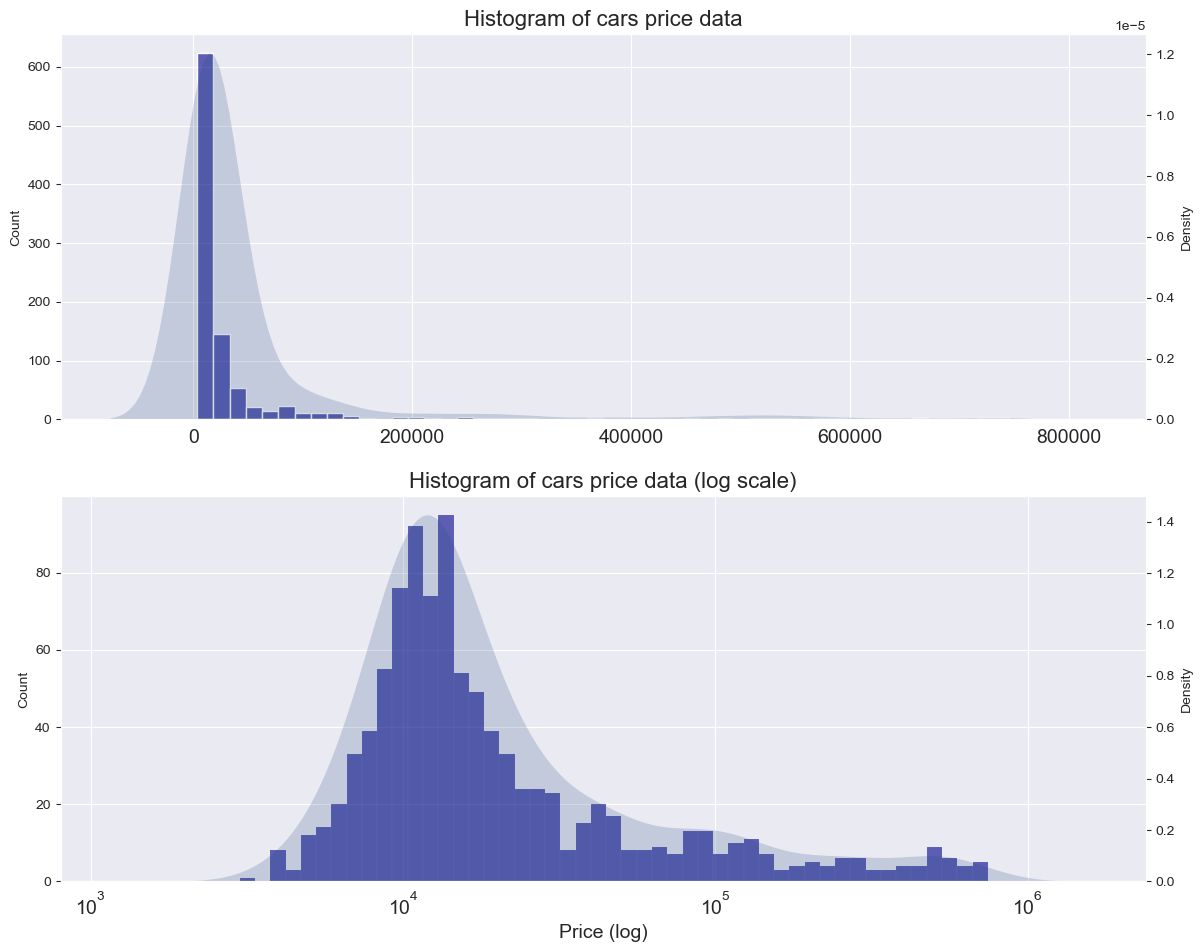

In [15]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='price',bins=50, alpha=.6, color='darkblue', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='price',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

In [16]:
df[df.make=='Nissan']

make         model                  car                   variant  \
101   Nissan  Micra Active  Nissan Micra Active                        Xl   
102   Nissan  Micra Active  Nissan Micra Active                        Xv   
103   Nissan  Micra Active  Nissan Micra Active                    Xl (O)   
922   Nissan         Sunny         Nissan Sunny                 Xe Petrol   
923   Nissan         Sunny         Nissan Sunny                 Xl Petrol   
924   Nissan         Sunny         Nissan Sunny                 Xl Diesel   
925   Nissan         Sunny         Nissan Sunny                 Xv Diesel   
926   Nissan         Sunny         Nissan Sunny                 Xe Diesel   
927   Nissan         Sunny         Nissan Sunny                    Xv Cvt   
928   Nissan         Sunny         Nissan Sunny    Special Edition Diesel   
985   Nissan       Terrano       Nissan Terrano                 Xe D 85Ps   
986   Nissan       Terrano       Nissan Terrano   Xv D Premium 110 Ps Amt   
987   Nissan       Terrano       Nissan Terrano                    Xl (P)   
988   Nissan       Terrano       Nissan Terrano                   Xl D(O)   
989   Nissan       Terrano       Nissan Terrano       Xv D Premium 110 Ps   
990   Nissan       Terrano       Nissan Terrano             Sport Edition   
1055  Nissan           Gtr           Nissan Gtr                    3.8 V6   
1080  Nissan         Micra         Nissan Micra                Xl (O) Cvt   
1081  Nissan         Micra         Nissan Micra                    Xv Cvt   
1082  Nissan         Micra         Nissan Micra                   Xld (O)   
1083  Nissan         Micra         Nissan Micra                       Xvd   
1196  Nissan         Kicks         Nissan Kicks                 Xl Petrol   
1197  Nissan         Kicks         Nissan Kicks                 Xv Petrol   
1198  Nissan         Kicks         Nissan Kicks                 Xl Diesel   
1199  Nissan         Kicks         Nissan Kicks                 Xv Diesel   
1200  Nissan         Kicks         Nissan Kicks                Xv Premium   
1201  Nissan         Kicks         Nissan Kicks            Xv Premium (O)   
1202  Nissan         Kicks         Nissan Kicks  Xv Premium (O) Dual Tone   
1203  Nissan         Kicks         Nissan Kicks                 Xe Diesel   

      body_type fuel_type fuel_system       type               drivetrain  \
101   Hatchback    Petrol   Injection     Manual  FWD (Front Wheel Drive)   
102   Hatchback    Petrol   Injection     Manual  FWD (Front Wheel Drive)   
103   Hatchback    Petrol   Injection     Manual  FWD (Front Wheel Drive)   
922       Sedan    Petrol   Injection     Manual  FWD (Front Wheel Drive)   
923       Sedan    Petrol   Injection     Manual  FWD (Front Wheel Drive)   
924       Sedan    Diesel   Injection     Manual  FWD (Front Wheel Drive)   
925       Sedan    Diesel   Injection     Manual  FWD (Front Wheel Drive)   
926       Sedan    Diesel   Injection     Manual  FWD (Front Wheel Drive)   
927       Sedan    Petrol   Injection  Automatic  FWD (Front Wheel Drive)   
928       Sedan    Diesel   Injection     Manual  FWD (Front Wheel Drive)   
985         SUV    Diesel   Injection     Manual  FWD (Front Wheel Drive)   
986         SUV    Diesel   Injection  Automatic  FWD (Front Wheel Drive)   
987         SUV    Petrol   Injection     Manual  FWD (Front Wheel Drive)   
988         SUV    Diesel   Injection     Manual  FWD (Front Wheel Drive)   
989         SUV    Diesel   Injection     Manual  FWD (Front Wheel Drive)   
990         SUV    Diesel   Injection     Manual  FWD (Front Wheel Drive)   
1055      Coupe    Petrol   Injection  Automatic    AWD (All Wheel Drive)   
1080  Hatchback    Petrol   Injection  Automatic  FWD (Front Wheel Drive)   
1081  Hatchback    Petrol   Injection  Automatic  FWD (Front Wheel Drive)   
1082  Hatchback    Diesel   Injection     Manual  FWD (Front Wheel Drive)   
1083  Hatchback    Diesel   Injection     Manual  FWD (Front Wheel Drive)   
119

In [17]:
df[df.model =='Corolla Altis']

make          model                   car       variant body_type  \
734  Toyota  Corolla Altis  Toyota Corolla Altis      G Petrol     Sedan   
735  Toyota  Corolla Altis  Toyota Corolla Altis   G At Petrol     Sedan   
736  Toyota  Corolla Altis  Toyota Corolla Altis     Gl Petrol     Sedan   
737  Toyota  Corolla Altis  Toyota Corolla Altis     Gl Diesel     Sedan   
738  Toyota  Corolla Altis  Toyota Corolla Altis      G Diesel     Sedan   
739  Toyota  Corolla Altis  Toyota Corolla Altis  Vl At Petrol     Sedan   

    fuel_type fuel_system       type               drivetrain  displacement  \
734    Petrol   Injection     Manual  FWD (Front Wheel Drive)          1798   
735    Petrol   Injection  Automatic  FWD (Front Wheel Drive)          1798   
736    Petrol   Injection     Manual  FWD (Front Wheel Drive)          1798   
737    Diesel   Injection     Manual  FWD (Front Wheel Drive)          1364   
738    Diesel   Injection     Manual  FWD (Front Wheel Drive)          1364   
739    Petrol   Injection  Automatic  FWD (Front Wheel Drive)          1798   

     ...  torque  fuel_tank  height  length   width  doors  seats  wheelbase  \
734  ...     173       55.0  1475.0  4620.0  1775.0      4      5     2700.0   
735  ...     173       55.0  1475.0  4620.0  1775.0      4      5     2700.0   
736  ...     173       55.0  1475.0  4620.0  1775.0      4      5     2700.0   
737  ...     205       43.0  1475.0  4620.0  1775.0      4      5     2700.0   
738  ...     205       43.0  1475.0  4620.0  1775.0      4      5     2700.0   
739  ...     173       55.0  1475.0  4620.0  1775.0      4      5     2700.0   

     airbags  price  
734        3  23030  
735        3  25284  
736        7  26348  
737        3  27104  
738        3  24794  
739        7  28266  

[6 rows x 23 columns]

In [18]:
df[df.model =='Kwid']

make model           car              variant  body_type fuel_type  \
12  Renault  Kwid  Renault Kwid              Rxe 0.8  Hatchback    Petrol   
13  Renault  Kwid  Renault Kwid              Std 0.8  Hatchback    Petrol   
14  Renault  Kwid  Renault Kwid              Rxl 0.8  Hatchback    Petrol   
15  Renault  Kwid  Renault Kwid              Rxt 0.8  Hatchback    Petrol   
16  Renault  Kwid  Renault Kwid              Rxt 1.0  Hatchback    Petrol   
17  Renault  Kwid  Renault Kwid       Climber 1.0 Mt  Hatchback    Petrol   
18  Renault  Kwid  Renault Kwid          Rxt Amt 1.0  Hatchback    Petrol   
19  Renault  Kwid  Renault Kwid      Climber Amt 1.0  Hatchback    Petrol   
20  Renault  Kwid  Renault Kwid          Rxt (O) 1.0  Hatchback    Petrol   
21  Renault  Kwid  Renault Kwid      Rxt (O) Amt 1.0  Hatchback    Petrol   
22  Renault  Kwid  Renault Kwid   Climber (O) Mt 1.0  Hatchback    Petrol   
23  Renault  Kwid  Renault Kwid  Climber (O) Amt 1.0  Hatchback    Petrol   

   fuel_system       type               drivetrain  displacement  ...  torque  \
12   Injection     Manual  FWD (Front Wheel Drive)           799  ...      72   
13   Injection     Manual  FWD (Front Wheel Drive)           799  ...      72   
14   Injection     Manual  FWD (Front Wheel Drive)           799  ...      72   
15   Injection     Manual  FWD (Front Wheel Drive)           799  ...      72   
16   Injection     Manual  FWD (Front Wheel Drive)           999  ...      91   
17   Injection     Manual  FWD (Front Wheel Drive)           999  ...      91   
18   Injection  Automatic  FWD (Front Wheel Drive)           999  ...      91   
19   Injection  Automatic  FWD (Front Wheel Drive)           999  ...      91   
20   Injection     Manual  FWD (Front Wheel Drive)           999  ...      91   
21   Injection  Automatic  FWD (Front Wheel Drive)           999  ...      91   
22   Injection     Manual  FWD (Front Wheel Drive)           999  ...      91   
23   Injection  Automatic  FWD (Front Wheel Drive)           999  ...      91   

    fuel_tank  height  length   width  doors  seats  wheelbase  airbags  price  
12       28.0  1490.0  3731.0  1579.0      5      5     2422.0        1   4946  
13       28.0  1490.0  3731.0  1579.0      5      5     2442.0        1   3966  
14       28.0  1490.0  3731.0  1579.0      5      5     2422.0        1   5366  
15       28.0  1490.0  3731.0  1580.0      5      5     2422.0        1   5786  
16       28.0  1490.0  3731.0  1579.0      5      5     2422.0        1   6066  
17       28.0  1490.0  3731.0  1579.0      5      5     2422.0        1   6362  
18       28.0  1490.0  3731.0  1579.0      5      5     2422.0        1   6486  
19       28.0  1490.0  3731.0  1579.0      5      5     2422.0        1   6782  
20       28.0  1490.0  3731.0  1579.0      5      5     2422.0        2   6173  
21       28.0  1490.0  3731.0  1579.0      5      5     2422.0        2   6593  
22       28.0  1490.0  3731.0  1579.0      5      5     2422.0        2   6470  
23       28.0  1490.0  3731.0  1579.0      5      5     2422.0        2   6890  

[12 rows x 23 columns]

6. Bar Charts:
Plot bar charts to represent the count of categorical variables (e.g., car models, manufacturers).


C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



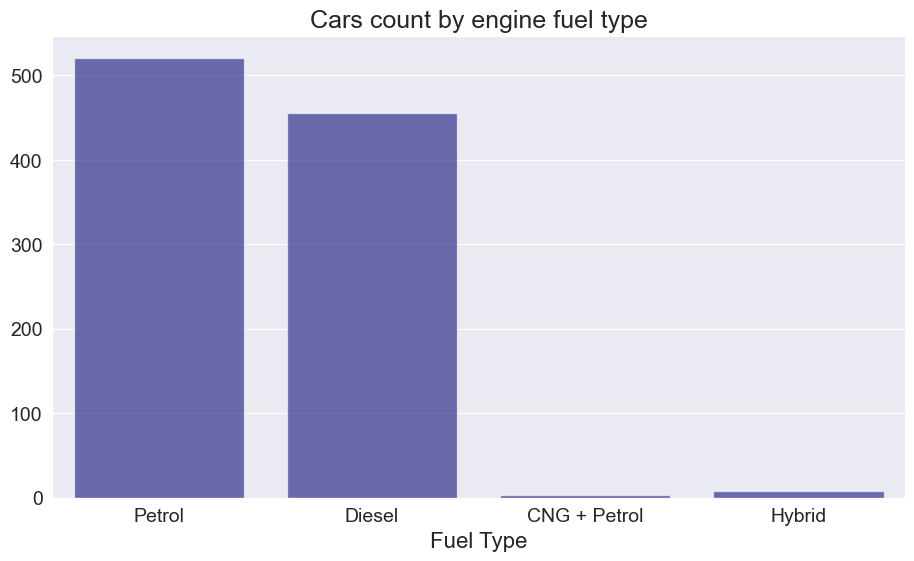

In [19]:
plt.figure(figsize=(11,6))
sns.countplot(data=df, x='fuel_type',alpha=.6, color='darkblue')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('');

In [20]:
# Calculate counts of car models
model_counts = df['model'].value_counts().reset_index()
model_counts.columns = ['model', 'count']

# Calculate counts of car manufacturers
make_counts = df['make'].value_counts().reset_index()
make_counts.columns = ['make', 'count']

# Display the counts
print("Counts of Car Models:")
print(model_counts)

print("\nCounts of Car Manufacturers:")
print(make_counts)

Counts of Car Models:
                 model  count
0                Nexon     24
1           Kuv100 Nxt     22
2               Xuv500     21
3              Compass     21
4                Amaze     20
..                 ...    ...
191              Prius      1
192  V90 Cross Country      1
193                Gtr      1
194            Vantage      1
195            Montero      1

[196 rows x 2 columns]

Counts of Car Manufacturers:
                make  count
0      Maruti Suzuki    143
1           Mahindra    101
2            Hyundai     97
3             Toyota     82
4               Tata     81
5              Honda     59
6              Skoda     43
7               Ford     42
8            Renault     35
9                Bmw     32
10            Nissan     29
11        Volkswagen     28
12              Jeep     28
13              Audi     22
14              Fiat     21
15            Jaguar     20
16            Datsun     15
17             Volvo     12
18       Lamborghini     12
19  

In [21]:
import plotly.graph_objects as go

# Create traces for the bar charts
trace1 = go.Bar(x=model_counts['model'], y=model_counts['count'], name='Car Models')
trace2 = go.Bar(x=make_counts['make'], y=make_counts['count'], name='Manufacturers')

# Create a dropdown menu for switching between the bar charts
buttons = [
    {'label': 'Car Models', 'method': 'update', 'args': [{'visible': [True, False]}]},
    {'label': 'Manufacturers', 'method': 'update', 'args': [{'visible': [False, True]}]}
]

# Create the layout with dropdown menu
layout = go.Layout(
    title='Count of Car Models and Manufacturers',
    xaxis=dict(title='Car Model / Manufacturer'),
    yaxis=dict(title='Count'),
    updatemenus=[{'buttons': buttons, 'direction': 'down', 'showactive': True}]
)

# Create the figure with both bar charts
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the interactive plot
fig.show()


C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



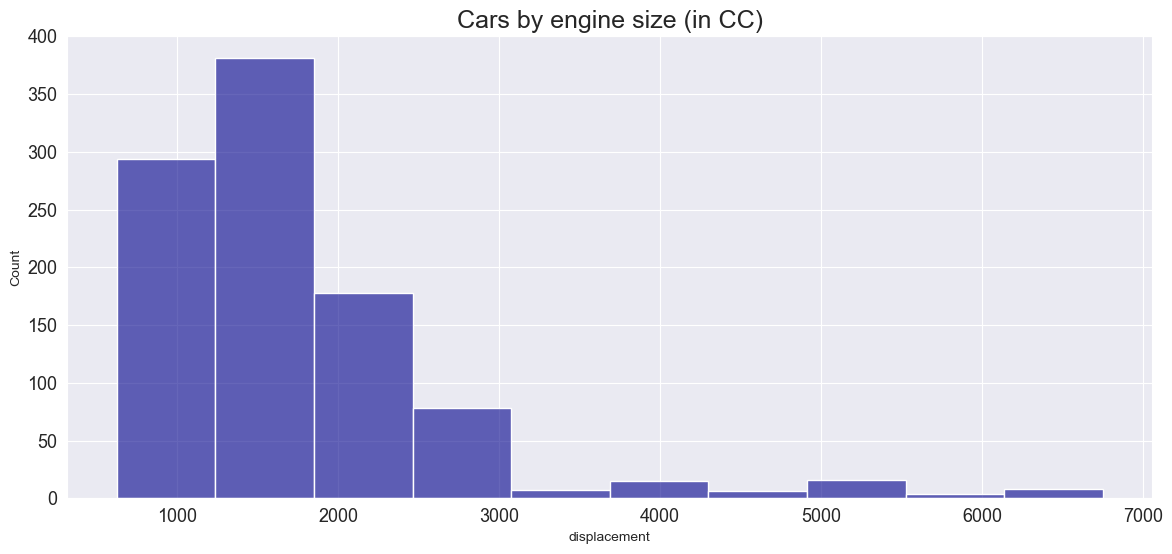

In [22]:

plt.figure(figsize=(14,6))
sns.histplot(data=df, x='displacement',alpha=.6, color='darkblue',bins=10)
plt.title('Cars by engine size (in CC)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



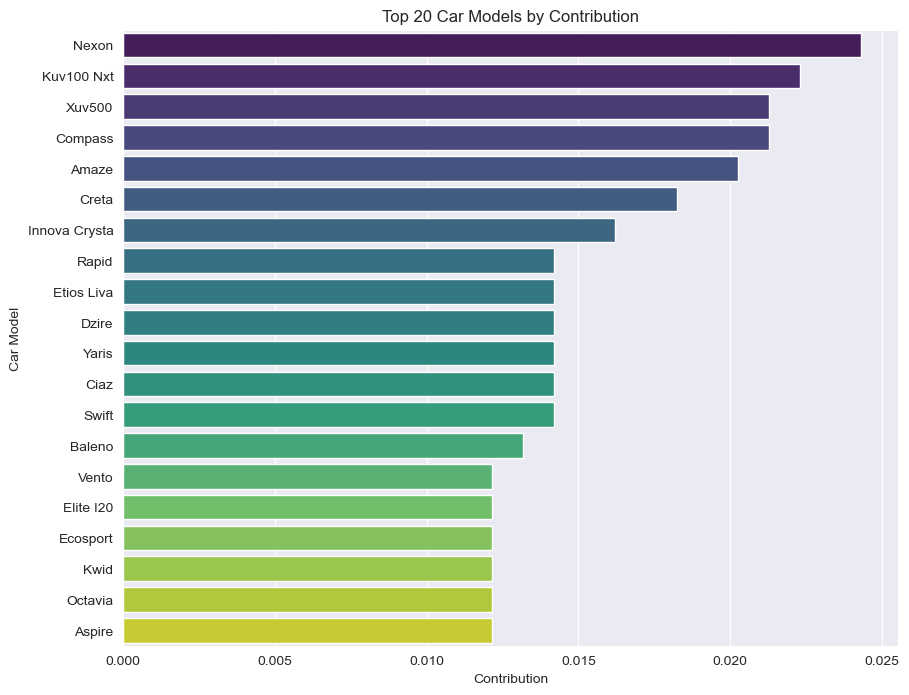

In [23]:
# Calculate the contribution of each car model
model_contribution = df['model'].value_counts(normalize=True).reset_index()
model_contribution.columns = ['model', 'contribution']

# Sort by contribution and select the top 20 models
top_models = model_contribution.nlargest(20, 'contribution')

# Create a horizontal bar plot for the top 20 car models
plt.figure(figsize=(10, 8))
sns.barplot(x='contribution', y='model', data=top_models, palette='viridis')
plt.title('Top 20 Car Models by Contribution')
plt.xlabel('Contribution')
plt.ylabel('Car Model')
plt.show()

In [24]:
# Check the number of unique car models in the dataset
num_unique_models = df['body_type'].nunique()
print(f'The dataset contains {num_unique_models} unique car models.')


The dataset contains 16 unique car models.


In [25]:
# Calculate the count of each unique car model
body_type_counts = df['body_type'].value_counts().head(5)

# Create a DataFrame from the top 5 body type counts
top_body_types_df = body_type_counts.reset_index()
top_body_types_df.columns = ['Body Type', 'Count']

# Create an interactive bar chart using Plotly Express
fig = px.bar(top_body_types_df, x='Body Type', y='Count', title='Count of Top 5 Car Body Types')
fig.update_layout(xaxis_title='Body Type', yaxis_title='Count')

# Show the interactive bar chart
fig.show()

7. Box Plots:
Use box plots to identify outliers and understand the distribution of numeric variables.



C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



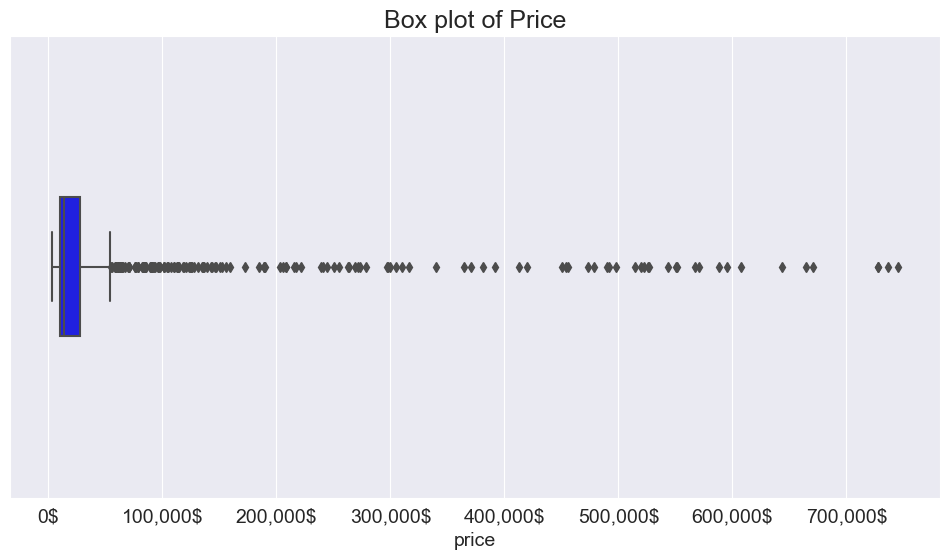

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price',width=.3,color='blue', hue= 'fuel_type')
plt.title('Box plot of Price',fontsize=18)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14)
plt.xlabel('price',fontsize=14);

In [27]:
# Create an interactive box plot using Plotly Express
fig = px.box(df, x='fuel_type', y='price', color='fuel_type', title='Box plot of Price',
             labels={'fuel_type': 'Fuel Type', 'price': 'Price'},
             category_orders={'fuel_type': df['fuel_type'].value_counts().index.tolist()})
fig.update_layout(xaxis_title='Fuel Type', yaxis_title='Price', xaxis={'categoryorder':'total descending'})

# Show the interactive plot
fig.show()

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



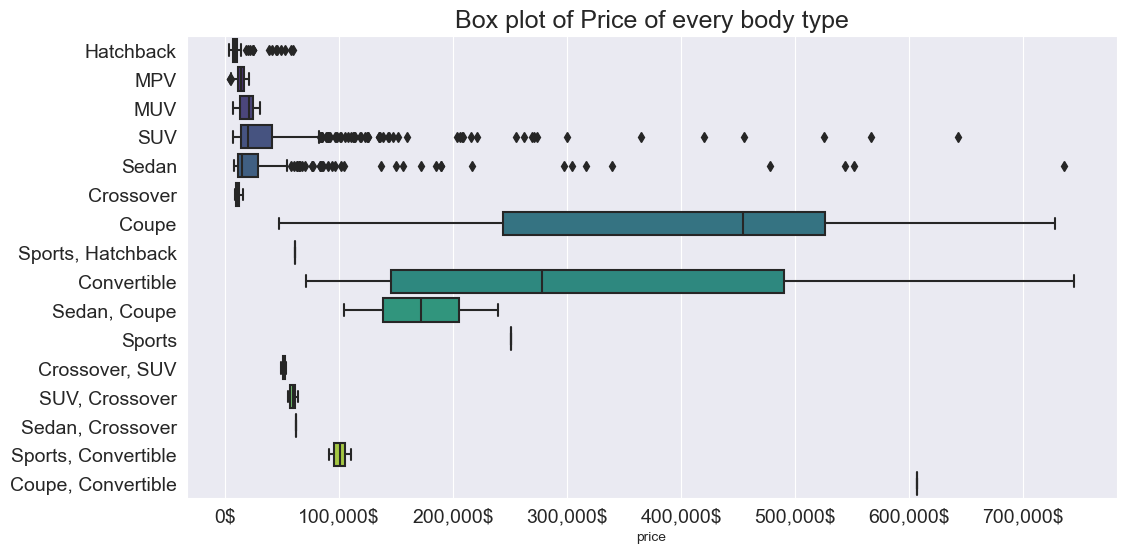

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price', y='body_type', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14);

In [29]:
fig = px.box(df, x='make', y='price')
fig.update_layout(height=500, width=800, title='Box Plot of Car Prices')
fig.show()

8. Pie Charts:
Represent the contribution of different car models or manufacturers using pie charts.



Number of Unique Car Models in Dataset

In [30]:
# Check the number of unique car models in the dataset
num_unique_models = df['model'].nunique()
print(f'The dataset contains {num_unique_models} unique car models.')


The dataset contains 196 unique car models.


Unique Car Models in the Dataset:

In [31]:
# Get a list of all unique car models in the dataset
unique_models = df['model'].unique()

# Print the list of unique car models
print(unique_models)


['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Polo'
 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Kodiaq' 'Avanti' 'Q3' 'John Cooper Works' 'Xe'
 'Xf' 'A3 Cabriolet' 'A6' 'X3' 'S5' 'Mustang' 'Grand Cherokee'
 'M2 Competition' '718' 'Land Cruiser Prado' 'Rx 450H' '7-Series'
 'Levante' 'Granturismo' 'Quattroporte' 'Panamera' 'R8' 'Urus'
 'Continental Gt' 'Portofino' 'Bentayga' '458 Speciale' 'Mulsanne' 'Alto'
 'S-Presso' 'Celerio' 'Grand I10 Prime' 'Kuv100 Nxt' 'Swift' 'Altroz'
 'Tigor' 'Zest' 'Amaze' 'Gypsy' 'Venue' 'Nexon' 'Linea'
 'Bolero Power Plus' 'Vitara Brezza' 'I20 Active' 'Ecosport' 'Duster'
 'Verna' 'Xuv300' 'Lodgy' 'Vento' 'Brv' 'Thar' 'Gurkha' 'Xl6'
 'Tuv300 Plus' 'Ma

Top 20 Car Models by Contribution

In [32]:
# Calculate the contribution of each car model
model_contribution = df['model'].value_counts(normalize=True).reset_index()
model_contribution.columns = ['model', 'contribution']

# Sort the dataframe by contribution (optional, for better visualization)
model_contribution = model_contribution.sort_values(by='contribution', ascending=False)

# Create a pie chart for the contribution of car models
fig = px.pie(model_contribution.head(20), values='contribution', names='model', title='Top 20 Car Models by Contribution')

# Show the interactive pie chart
fig.show()

In [33]:
# Calculate the contribution of each car model
model_contribution = df['model'].value_counts(normalize=True).reset_index()
model_contribution.columns = ['model', 'contribution']

# Sort the dataframe by contribution (optional, for better visualization)
model_contribution = model_contribution.sort_values(by='contribution', ascending=False)

# Create a pie chart for the contribution of car models
fig = px.pie(model_contribution.tail(20), values='contribution', names='model', title='Bottom 20 Car Models by Contribution')

# Show the interactive pie chart
fig.show()

Contribution of Car Manufacturers

In [34]:
# Calculate the contribution of each car manufacturer
manufacturer_contribution = df['make'].value_counts(normalize=True).reset_index()
manufacturer_contribution.columns = ['Manufacturer', 'Contribution',]

# Create an interactive pie chart for the contribution of car manufacturers
fig = px.pie(manufacturer_contribution, values='Contribution', names='Manufacturer', title='Contribution of Car Manufacturers')

# Show the interactive pie chart
fig.show()

**Bivariate Analysis:**

1. Correlation Matrix:
Create a correlation matrix to understand the relationships between numeric variables.


In [35]:
numeric_columns = df.select_dtypes(include=['number'])


In [36]:
correlation_matrix = numeric_columns.corr()


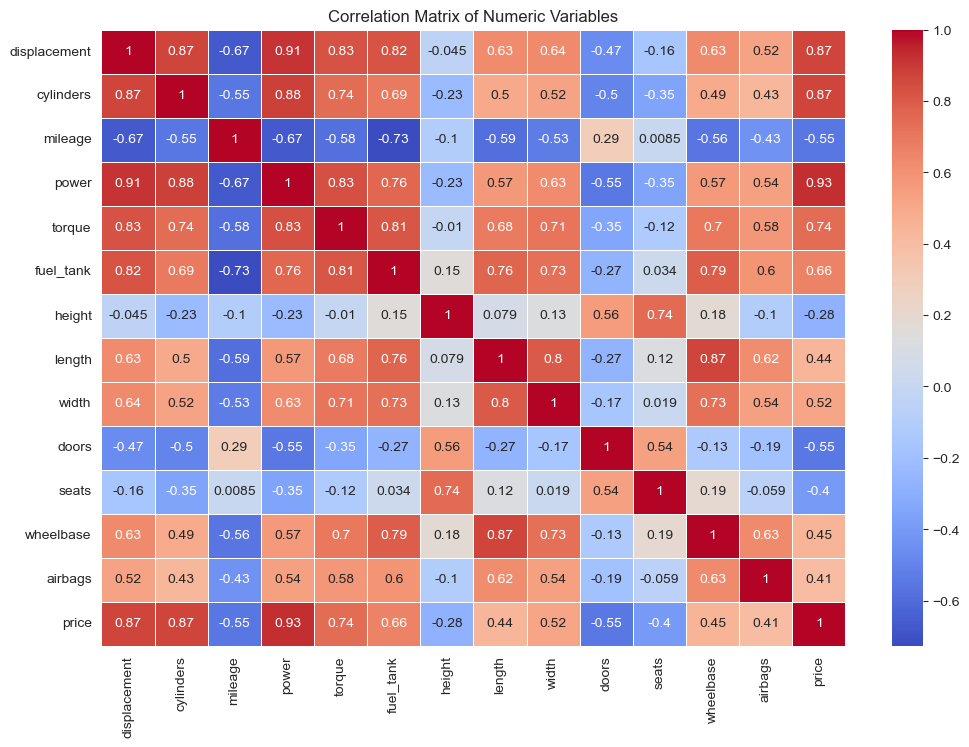

In [37]:
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


2. Scatter Plots:
Plot scatter plots to explore the relationship between two numeric variables (e.g., sales vs. price).


C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version.

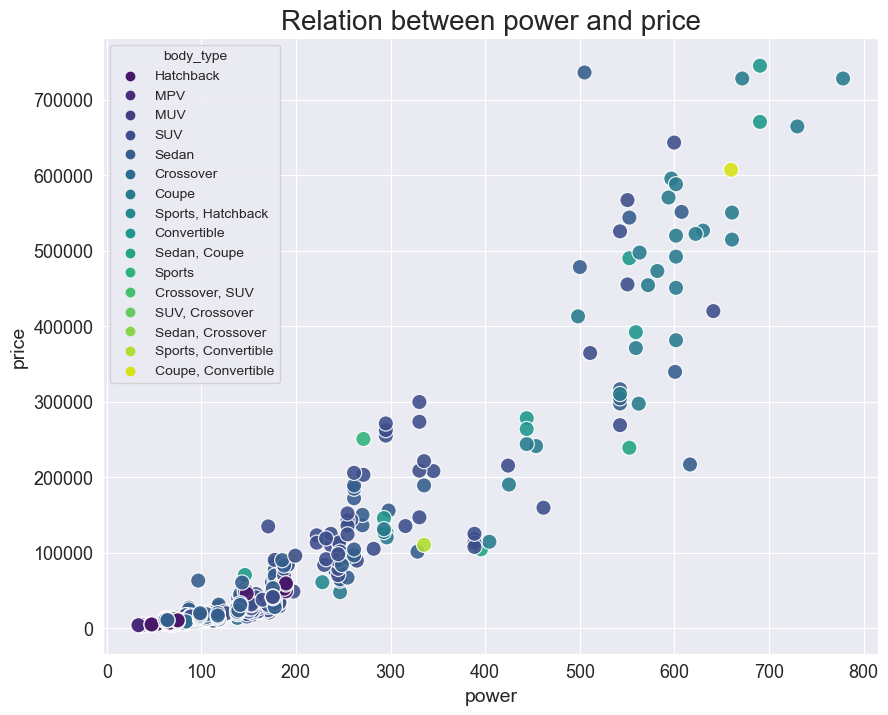

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='power', y='price',hue='body_type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('power',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between power and price',fontsize=20);

C:\Users\komak\AppData\Local\Temp\ipykernel_20908\3907512061.py:5: UserWarning:

Ignoring `ax`; jointplot is a figure-level function.

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\komak\anacon

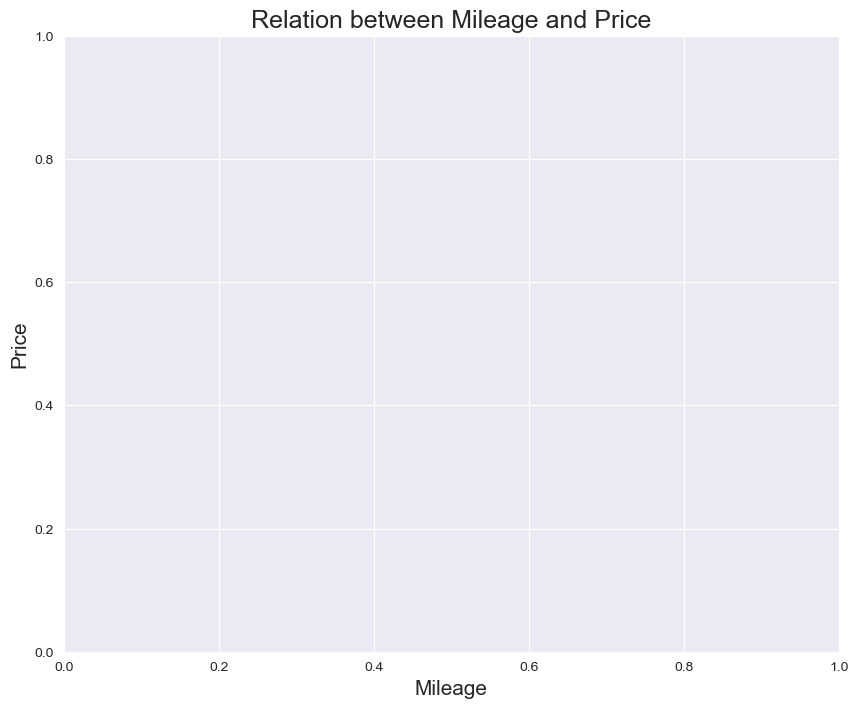

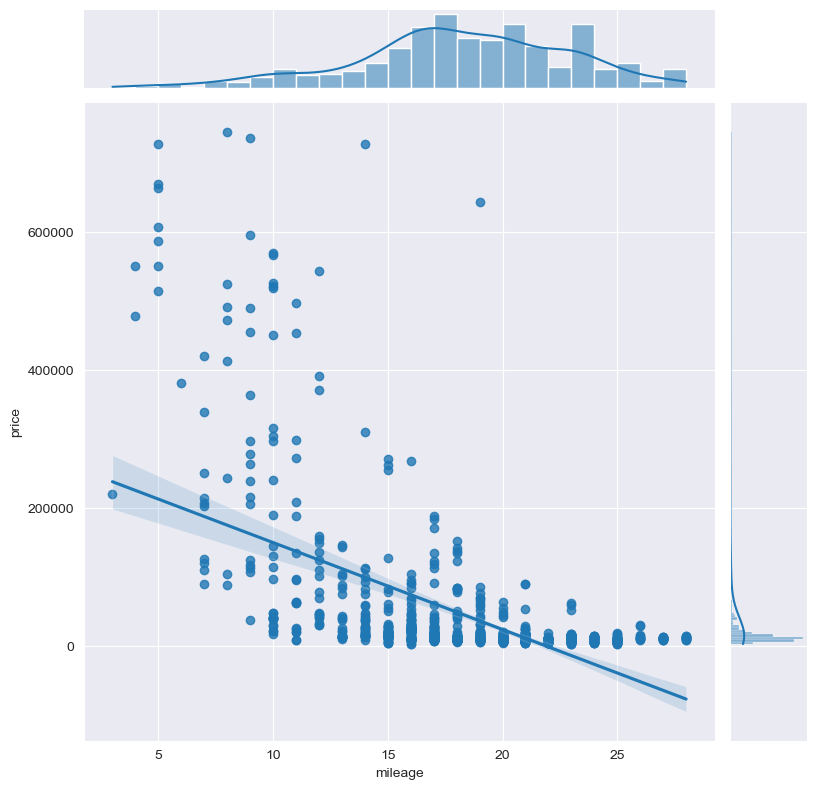

In [39]:
 #Create a figure and an axis (subplot) within that figure
fig, ax = plt.subplots(figsize=(10, 8))

# Use the axis (ax) to create the jointplot
sns.jointplot(data=df, x='mileage', y='price', kind='reg', ax=ax, palette='viridis', height=8, ratio=7)

# Add a title to the axis (ax)
ax.set_title('Relation between Mileage and Price', fontsize=18)

# Set labels for x and y axes
ax.set_xlabel('Mileage', fontsize=15)
ax.set_ylabel('Price', fontsize=15)

# Show the plot
plt.show()

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version.

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version.

C:\Users\komak\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



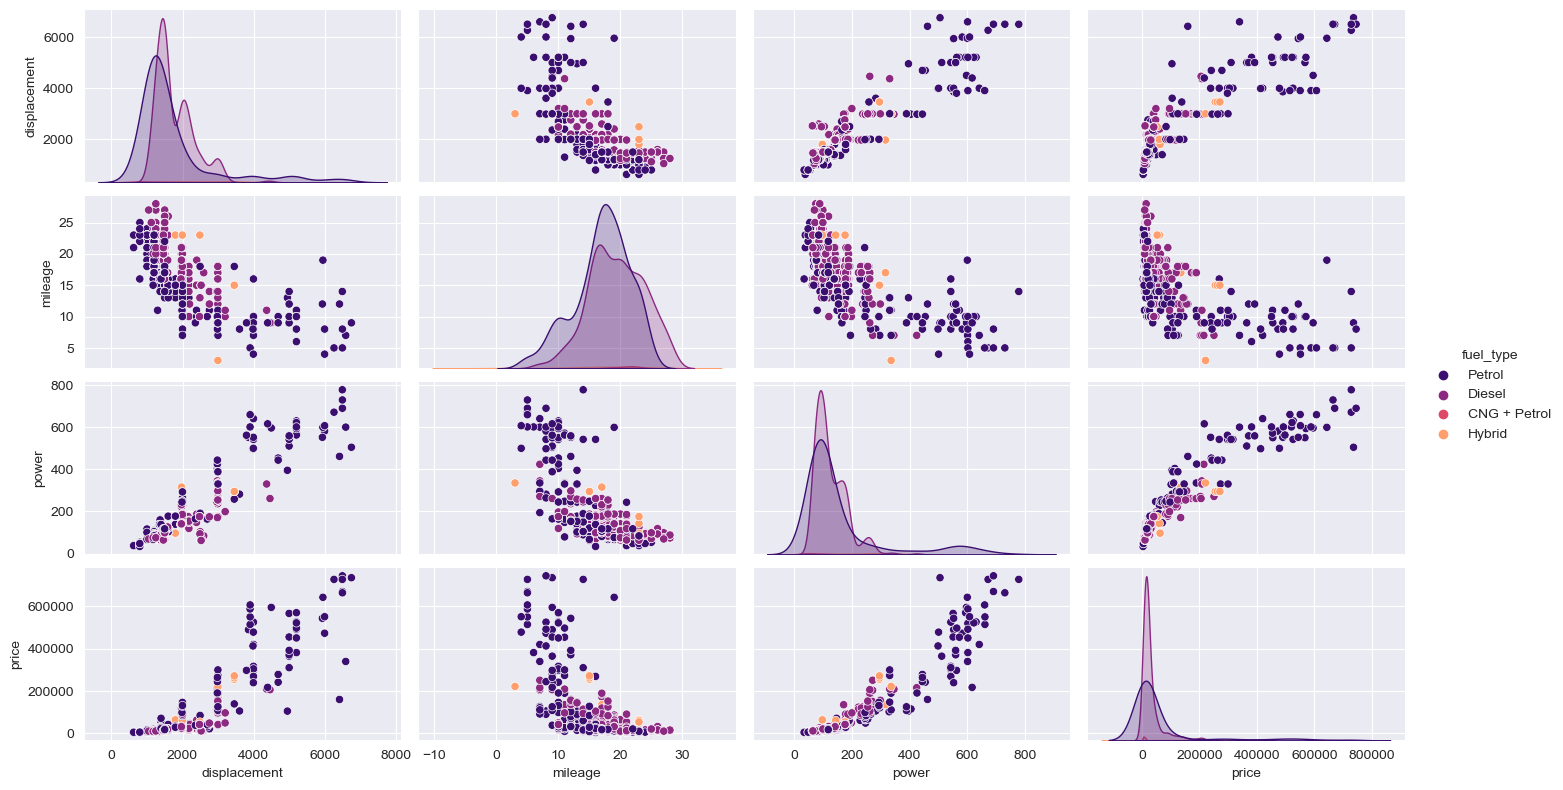

In [40]:
sns.pairplot(df,vars=[ 'displacement', 'mileage', 'power', 'price'], hue= 'fuel_type',
             palette=sns.color_palette('magma',n_colors=4),diag_kind='kde',height=2, aspect=1.8);

In [41]:
fig = px.scatter_3d(df, x='power', z='price', y='mileage',color='make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

3. Pair Plots:
Use pair plots for a quick overview of relationships between multiple numeric variables.


C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version.

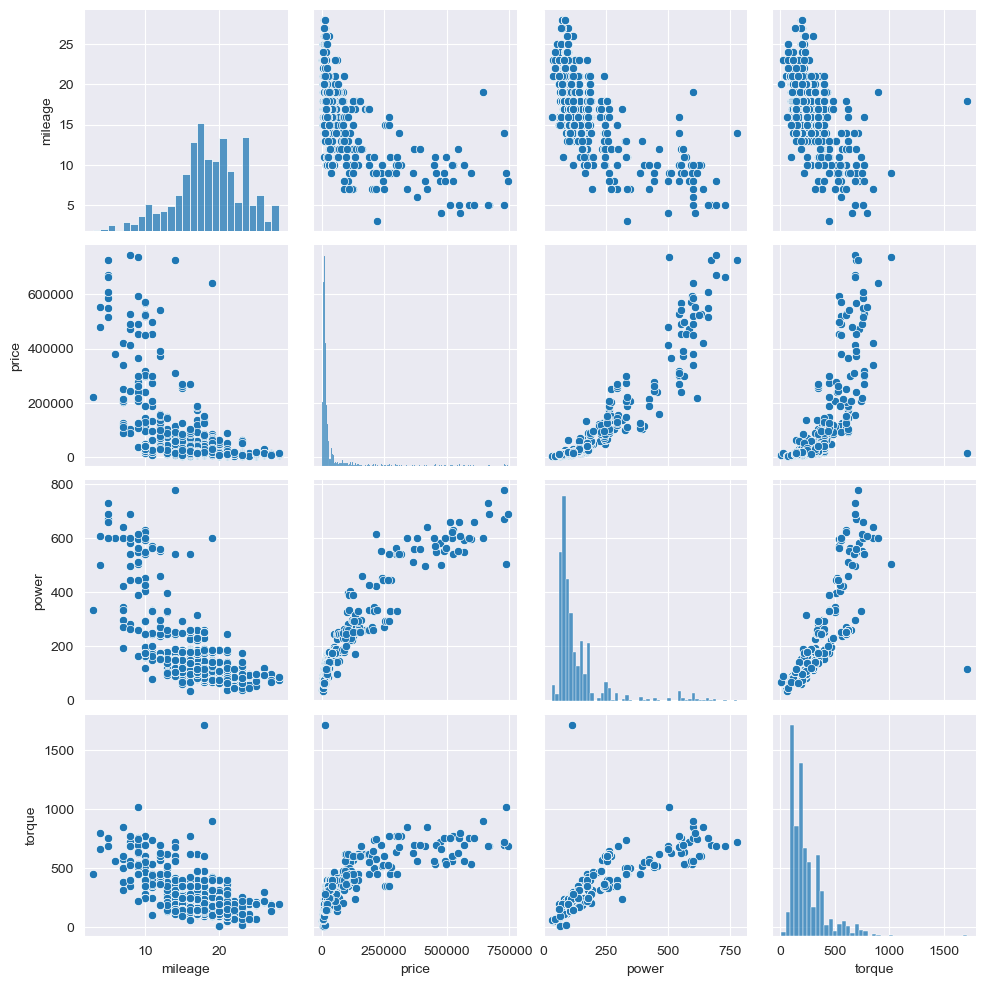

In [42]:
# Select the numeric columns you want to include in the pair plot
numeric_columns = ['mileage', 'price', 'power', 'torque']

# Create a pair plot
sns.pairplot(df[numeric_columns])

# Show the plot
plt.show()

4. Bar Charts with Hue:
Enhance bar charts by introducing the 'hue' parameter to represent additional categorical variables.


C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



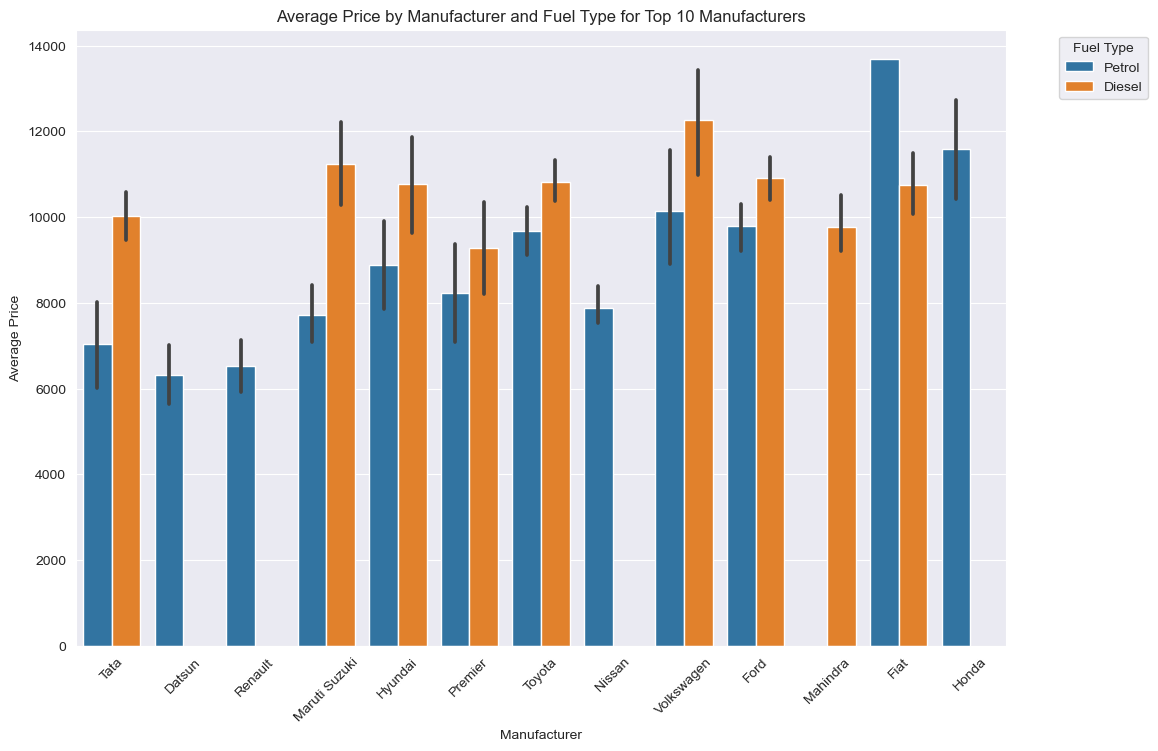

In [43]:

# Create a bar chart with hue
plt.figure(figsize=(12, 8))
sns.barplot(data=df.head(200), x='make', y='price', hue='fuel_type')
plt.title('Average Price by Manufacturer and Fuel Type for Top 10 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

5. Heatmaps:
Utilize heatmaps to visually represent the correlation matrix for better insights.


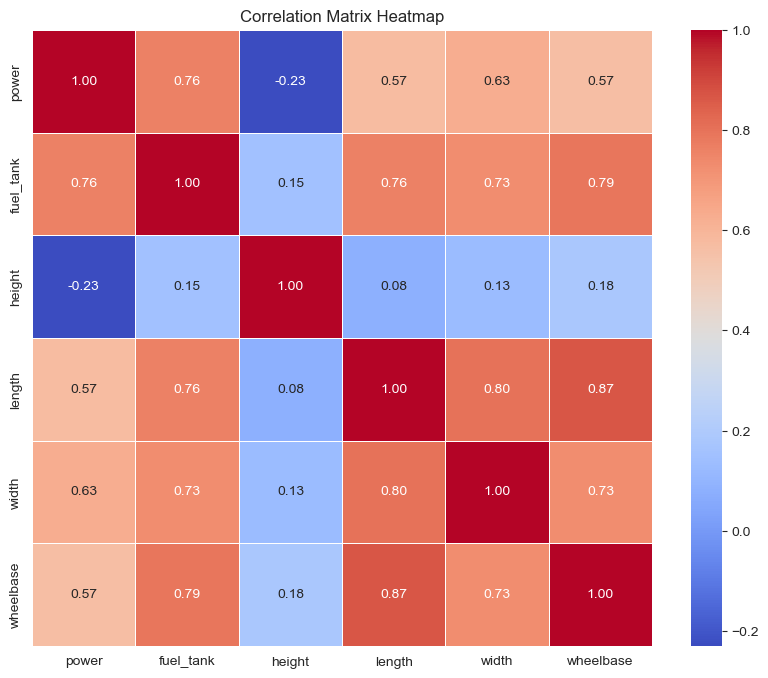

In [46]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df.drop(columns=non_numeric_columns).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

7. Box Plots with Hue:
Enhance box plots by introducing the 'hue' parameter to represent additional categorical variables.


In [47]:
# Create an interactive box plot using Plotly Express
fig = px.box(df.head(100), x='make', y='price', color='fuel_type', title='Box plot of Price',
             labels={'fuel_type': 'Fuel Type', 'price': 'Price'},
             category_orders={'fuel_type': df['fuel_type'].value_counts().index.tolist()})
fig.update_layout(xaxis_title='Fuel Type', yaxis_title='Price', xaxis={'categoryorder':'total descending'})

# Show the interactive plot
fig.show()

9. Violin Plots:
Visualize the distribution of numeric variables across different categories using violin plots.


C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\komak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



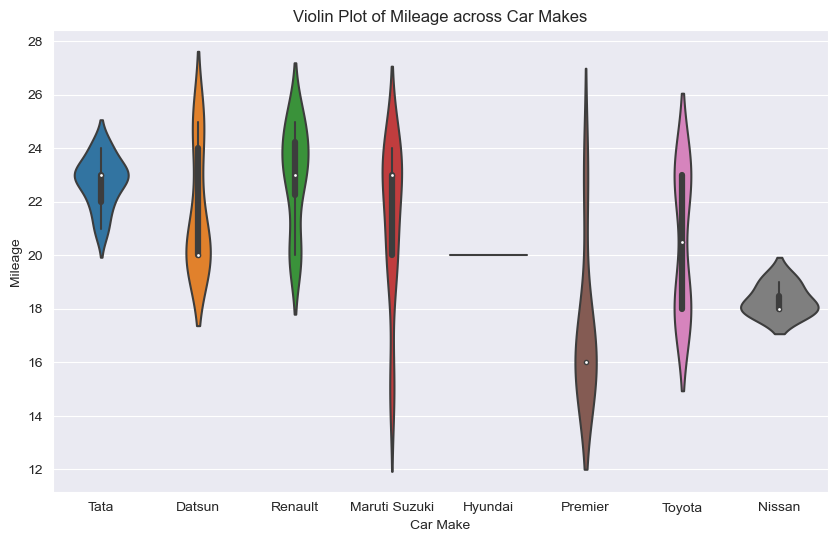

In [48]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df.head(100), x='make', y='mileage')
plt.title('Violin Plot of Mileage across Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Mileage')
plt.show()

10. Stacked Bar Charts:
Represent the combined contribution of different categories using stacked bar charts.


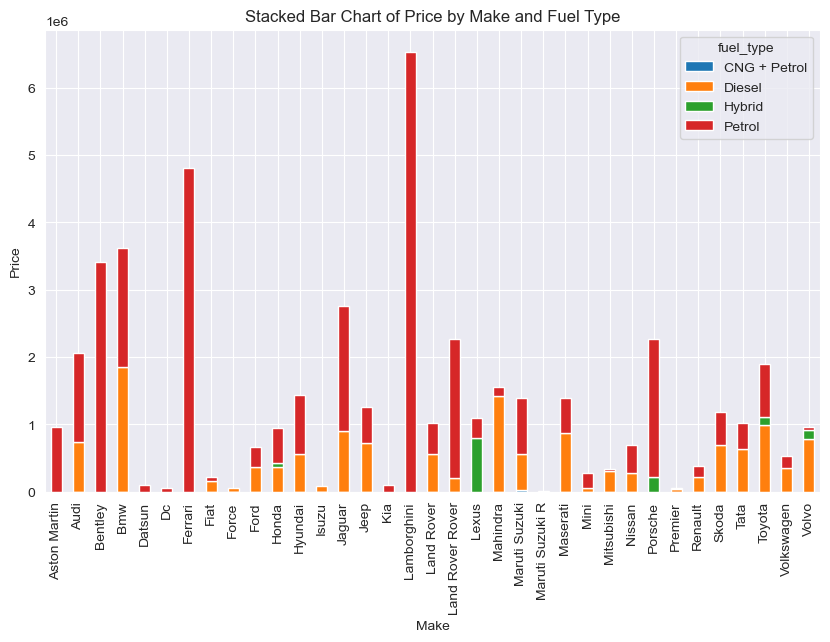

In [49]:
# Group by 'make' and 'fuel_type', then sum the 'price' for each group
grouped_df = df.groupby(['make', 'fuel_type'])['price'].sum().unstack()

# Plot the stacked bar chart
grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Stacked Bar Chart of Price by Make and Fuel Type')
plt.show()